# Aggregates

In [17]:
# imports
%matplotlib inline
import os
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

TITLE_RE = re.compile('/?(?P<encoding>[^/]*)/agg__(?P<column>.*)__(?P<aggregate>.*)\.csv')

def asByte(bytes):
    return bytes, 'Size in Bytes'

def toKB(bytes):
    return (bytes / 1024), 'Size in KB'

def toMB(bytes):
    return (toKB(bytes)[0] / 1024), 'Size in MB'

def toGB(bytes):
    return (toMB(bytes)[0] / 1024), 'Size in GB'

def asNanoseconds(nano):
    return nano, 'Time in ns'

def toMicroseconds(nano):
    return (nano / 1000), 'Time in µs'

def toMilliseconds(nano):
    return (toMicroseconds(nano)[0] / 1000), 'Time in ms'

def toSeconds(nano):
    return (toMilliseconds(nano)[0] / 1000), 'Time in s'

def pathToParts(path):
    path = path.lower()
    m = re.search(TITLE_RE, path)
    return m.group('encoding'), m.group('column'), m.group('aggregate')

def pathToTitle(path):
    path = path.lower()
    m = re.search(TITLE_RE, path)
    return "{} {} {}".format(m.group('encoding'), m.group('column'), m.group('aggregate')).title()

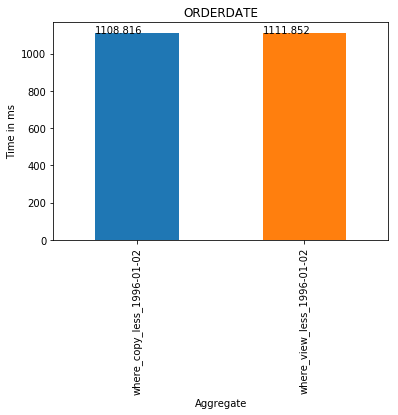

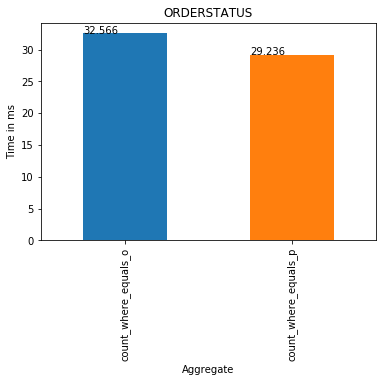

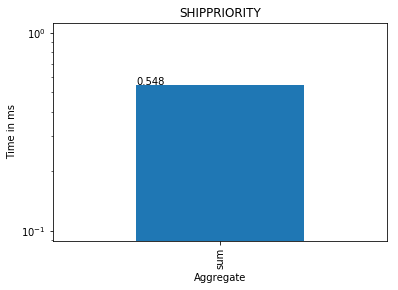

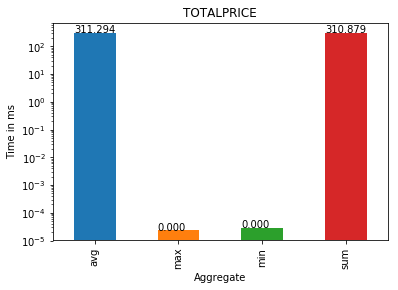

In [63]:
data_dir = "../data/dictionary/"
files = os.listdir(data_dir)

label = []
means = []
error = []
data_per_encoding_and_column = {}
for i, file_name in enumerate(files):
    file_name = os.path.join(data_dir, file_name)
    label = []
    means = []
    error = []
    if not 'agg__' in file_name.lower():
        continue
    data = pd.read_csv(file_name).iloc[:,0]
    
    encoding, column, _ = pathToParts(file_name)
    
    if encoding not in data_per_encoding_and_column:
        data_per_encoding_and_column[encoding] = {}
    if column not in data_per_encoding_and_column[encoding]:
        data_per_encoding_and_column[encoding][column] = []

    data_per_encoding_and_column[encoding][column].append(file_name)
    
for encoding, columns in data_per_encoding_and_column.items():
    for column_name, file_names in columns.items():
        column_results = pd.concat((pd.read_csv(f) for f in file_names), axis=1)
        column_names = [pathToParts(p)[2] for p in file_names]
        column_results.columns = column_names
        column_results, label = toMilliseconds(column_results)

        logy = (column_results.min() < 1).any()
        
        plt.figure()
        ax = column_results.apply(pd.Series.mean).plot(kind='bar', logy=logy, title=column_name.upper())
        plt.xticks(rotation=90)
        ax.set(xlabel="Aggregate", ylabel=label)
        for p in ax.patches:
            ax.annotate("{:.3f}".format(float(p.get_height())), (p.get_x(), p.get_height()))
       